In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,roc_auc_score,recall_score,precision_score,roc_curve,auc,f1_score,confusion_matrix,matthews_corrcoef,cohen_kappa_score,classification_report
from sklearn import metrics
from matplotlib import pyplot as plt
from numpy import argmax
from functools import reduce
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_validate,cross_val_score,GridSearchCV,KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from pycm import *
from itertools import cycle
from sklearn.preprocessing import label_binarize
from scipy import interp
from hyperopt import hp, fmin, tpe, Trials, partial,STATUS_OK
from hyperopt.pyll.stochastic import sample

SEED = 42
np.random.seed(SEED)

1.导入数据

In [2]:
# orig_data = pd.read_excel(r"C:\Users\XZD\Nutstore\1\data1\指标数据\train0502(standard).xls")
orig_data = pd.read_excel(r"F:\1\data1\指标数据\train0502(standard).xls")

In [3]:
X = orig_data.iloc[ :,2:16]
y = orig_data.iloc[:,-3]
z = orig_data.iloc[ :,2:17]
z


,旅游资源指数,土地资源指数,高程,年平均降水,年平均气温,NDVI,水系密度,空气质量,路网密度,交通设施数量,服务设施数量,网络关注度,GDP,政策条件指数,人工标签
0,-0.501229,0.805131,0.468452,0.698240,-0.291184,1.405660,-0.283995,1.080238,-0.538739,-0.502087,-0.333992,-0.238794,-0.055031,-0.793169,0
1,-0.501229,0.371298,-0.118365,-0.583800,0.089752,0.317483,-0.813795,-0.181715,-0.368836,0.469204,-0.333992,-0.238794,-0.282362,-0.793169,1
2,-0.501229,0.729626,1.285730,1.324032,-0.821205,-0.501995,-0.813795,1.294940,-0.891501,-0.502087,-0.333992,-0.238794,0.440035,-0.793169,0
3,-0.501229,0.546218,-0.243561,0.248458,0.244867,0.906471,-0.464511,1.294940,-0.651538,-0.502087,-0.333992,-0.238794,1.522605,0.637516,0
4,-0.501229,0.165585,-0.178199,0.133193,0.283783,0.587977,-0.813795,0.041331,-0.493197,-0.502087,-0.333992,0.324916,0.577862,-0.316274,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,3.775924,0.619308,1.229090,1.648874,-1.409966,0.713584,-0.556286,1.023309,0.228005,-0.016441,0.656691,7.089434,4.326236,3.975781,2
168,1.102703,0.132844,0.877004,1.057999,-0.640421,-0.415225,-0.169435,1.294940,-0.348767,-0.137852,0.768844,0.888626,-0.239777,0.637516,2
169,3.419494,-0.533561,-0.438419,0.062688,0.536552,-0.233560,0.715892,1.294940,0.466806,-0.380675,1.105303,-0.238794,-0.402292,1.114411,2
170,1.280918,-0.025775,-0.226480,-0.109534,0.345261,-0.508159,0.887873,0.090766,0.315089,-0.259264,1.404377,-0.238794,0.189019,-0.316274,2


In [6]:
y

0      0
1      1
2      0
3      0
4      0
      ..
167    2
168    2
169    2
170    2
171    0
Name: 人工标签, Length: 172, dtype: int64

In [23]:
#设定字体
config = {
    "font.sans-serif": ['SimSun'],
}
plt.rcParams.update(config)# 加入一行，解决中文不显示问题
plt.rcParams['axes.unicode_minus']=False # 解决负号不显示问题

c:\Users\XZD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


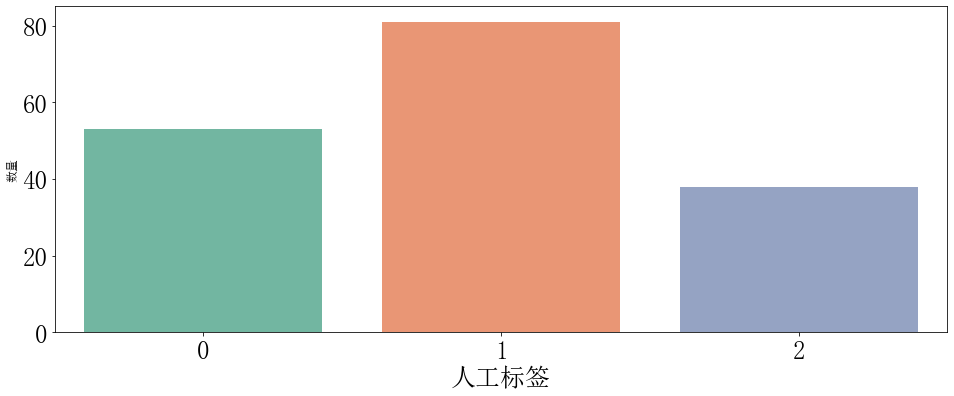

In [6]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(y, palette="Set2")
plt.xticks(rotation=0)
plt.ylabel('数量',fontsize=12)    #Y轴名称
plt.show()


2.相关性矩阵


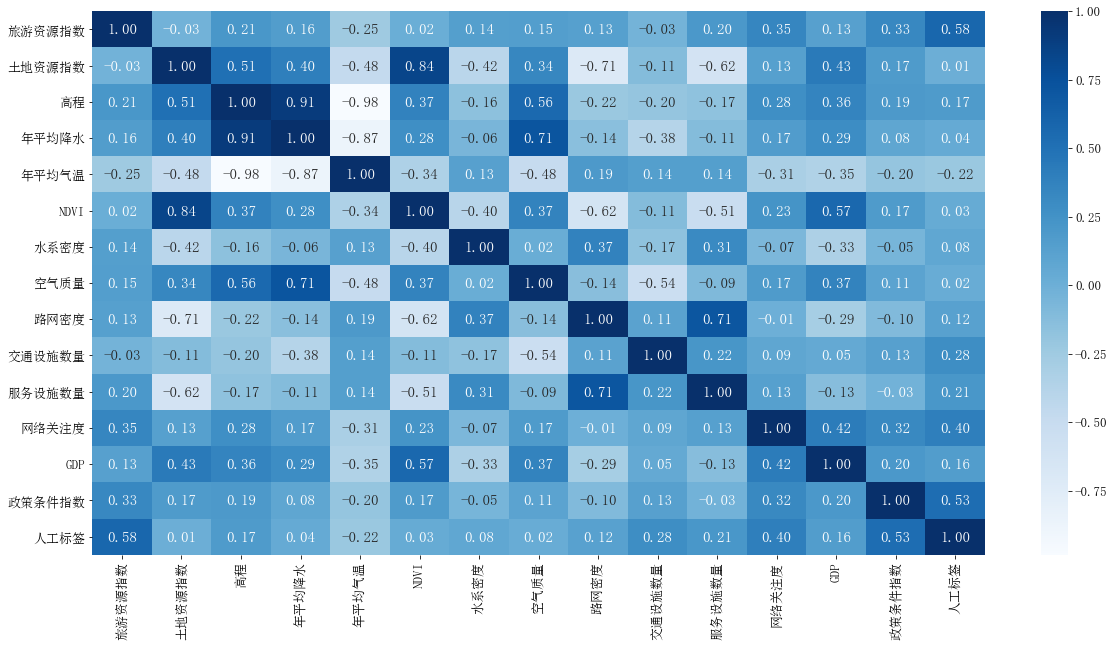

In [38]:
parameters = {'axes.labelsize': 15,
          'xtick.labelsize':13,
          'ytick.labelsize':13,
          'legend.fontsize':15}
plt.rcParams.update(parameters)
plt.figure(figsize=(20,10))
ax = sns.heatmap(z.corr(),annot=True,cmap='Blues',annot_kws={"fontsize":15},fmt=".2f")
plt.savefig(r"F:\1\data1\output\结果图片\结果\correlation(all)_0904.jpg",dpi=900)
plt.show()

In [6]:
data_test = pd.concat([X,y],axis=1)

In [7]:
data_test

,旅游资源指数,土地资源指数,高程,年平均降水,年平均气温,NDVI,水系密度,空气质量,路网密度,交通设施数量,服务设施数量,网络关注度,GDP,政策条件指数,人工标签
0,-0.501229,0.805131,0.468452,0.698240,-0.291184,1.405660,-0.283995,1.080238,-0.538739,-0.502087,-0.333992,-0.238794,-0.055031,-0.793169,0
1,-0.501229,0.371298,-0.118365,-0.583800,0.089752,0.317483,-0.813795,-0.181715,-0.368836,0.469204,-0.333992,-0.238794,-0.282362,-0.793169,1
2,-0.501229,0.729626,1.285730,1.324032,-0.821205,-0.501995,-0.813795,1.294940,-0.891501,-0.502087,-0.333992,-0.238794,0.440035,-0.793169,0
3,-0.501229,0.546218,-0.243561,0.248458,0.244867,0.906471,-0.464511,1.294940,-0.651538,-0.502087,-0.333992,-0.238794,1.522605,0.637516,0
4,-0.501229,0.165585,-0.178199,0.133193,0.283783,0.587977,-0.813795,0.041331,-0.493197,-0.502087,-0.333992,0.324916,0.577862,-0.316274,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,3.775924,0.619308,1.229090,1.648874,-1.409966,0.713584,-0.556286,1.023309,0.228005,-0.016441,0.656691,7.089434,4.326236,3.975781,2
168,1.102703,0.132844,0.877004,1.057999,-0.640421,-0.415225,-0.169435,1.294940,-0.348767,-0.137852,0.768844,0.888626,-0.239777,0.637516,2
169,3.419494,-0.533561,-0.438419,0.062688,0.536552,-0.233560,0.715892,1.294940,0.466806,-0.380675,1.105303,-0.238794,-0.402292,1.114411,2
170,1.280918,-0.025775,-0.226480,-0.109534,0.345261,-0.508159,0.887873,0.090766,0.315089,-0.259264,1.404377,-0.238794,0.189019,-0.316274,2


c:\Users\XZD\anaconda3\lib\site-packages\seaborn\axisgrid.py:142: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self.fig.draw(self.fig.canvas.get_renderer())
c:\Users\XZD\anaconda3\lib\site-packages\seaborn\axisgrid.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self.fig.draw(self.fig.canvas.get_renderer())
c:\Users\XZD\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self.fig.tight_layout(*args, **kwargs)


c:\Users\XZD\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


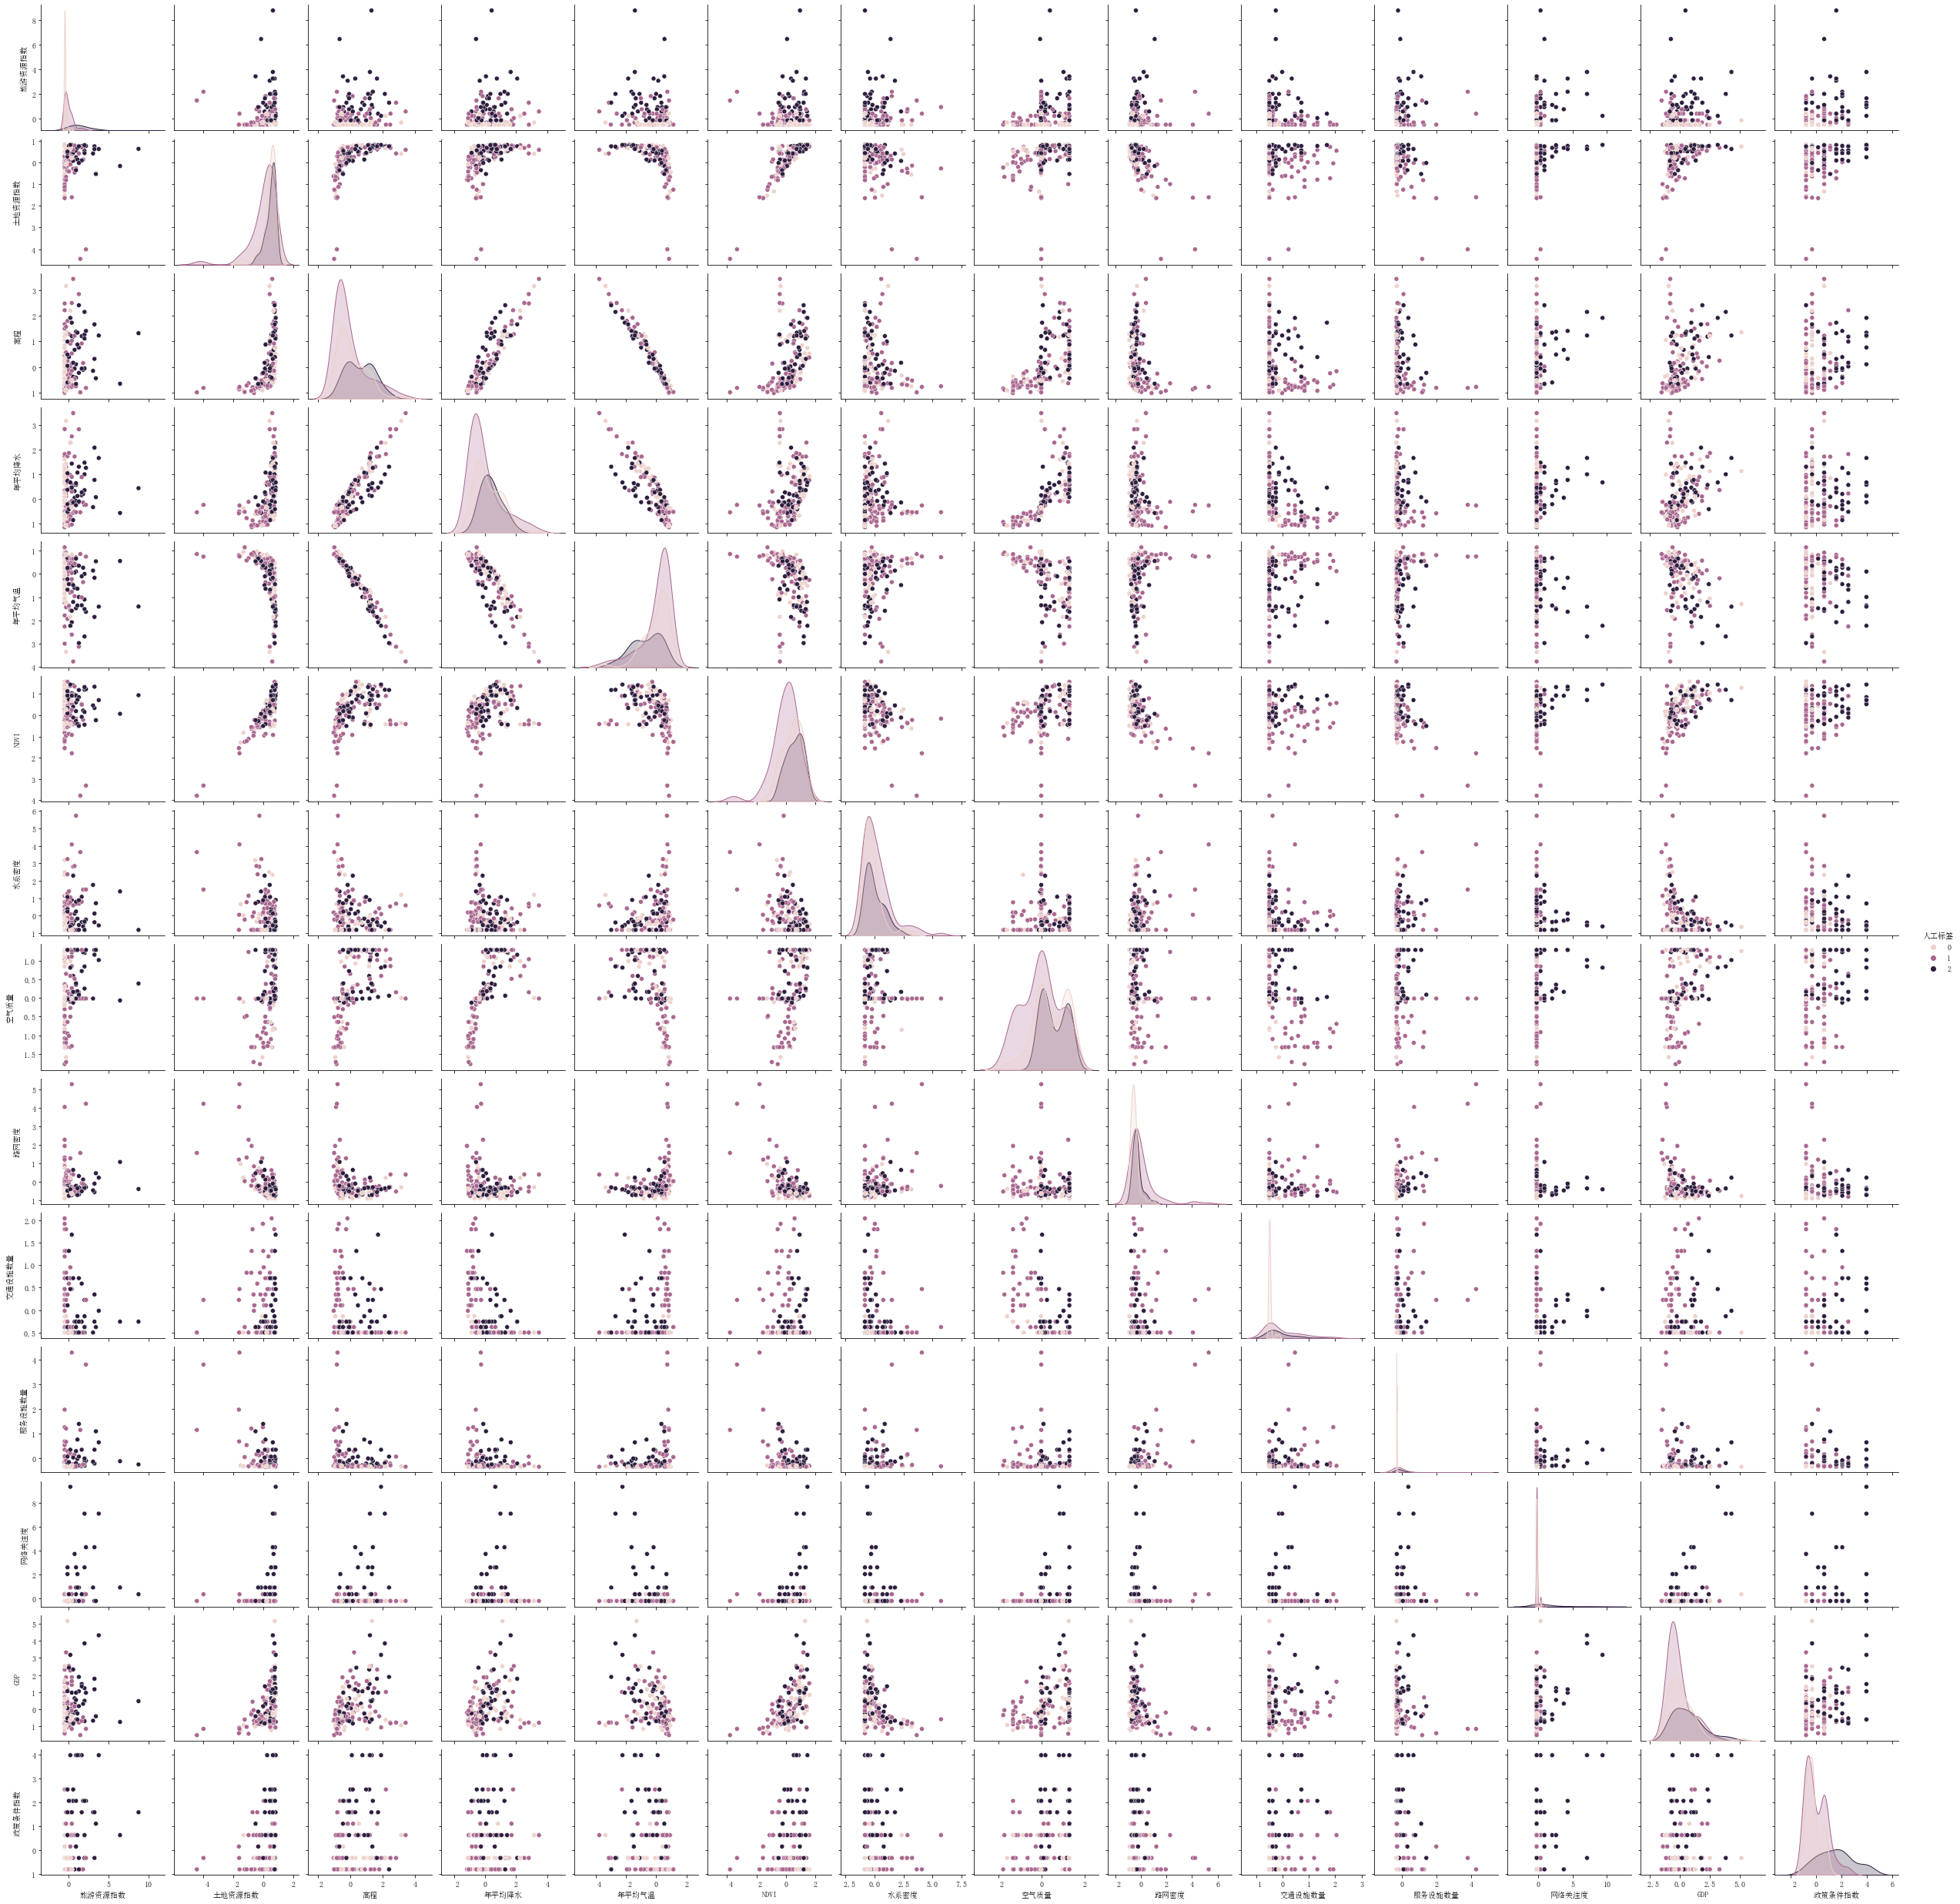

In [12]:
sns.pairplot(data_test,hue="人工标签") 
# plt.savefig("correlation.jpg")

3.划分训练集、测试集为7:3

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((111, 14), (61, 14), (111,), (61,))

In [9]:
#解决目前样本不均衡的问题方法1
from sklearn.utils import class_weight
class_weights = list(class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y_train),y=y_train))
#按照‘balance’原则，返回每个类别的权重
w_array = np.ones(y_train.shape[0], dtype = 'float')  #建立全部为1的 数组 
for i, val in enumerate(y_train):
    w_array[i] = class_weights[val-1]   #输入对应类别的权重

In [10]:
#predict the non label data预测无标签数据
from pandas import DataFrame
predict_data = pd.read_excel (r"F:\1\data1\指标数据\predict0502(standard）.xls")
#process = preprocessing.StandardScaler()
x_predict_data = predict_data.iloc[:,2:16] # process.fit_transform(predict_data)
x_predict_data

,旅游资源指数,土地资源指数,高程,年平均降水,年平均气温,NDVI,水系密度,空气质量,路网密度,交通设施数量,服务设施数量,网络关注度,GDP,政策条件指数
0,-0.501229,0.721966,0.845292,0.895283,-0.618040,1.080875,-0.492200,1.294940,-0.598226,-0.502087,-0.333992,-0.238794,1.172470,-0.316274
1,2.171991,-4.007317,-0.815904,-0.249113,0.737800,-3.318665,1.501072,-0.012864,4.234988,0.226382,3.815664,0.324916,-1.134995,-0.316274
2,-0.501229,-0.457193,-0.787046,-0.875410,0.674950,-0.571817,-0.813795,-1.284508,-0.413146,-0.137852,-0.333992,-0.238794,-0.723221,-0.316274
3,0.389845,-1.605923,-0.775077,-0.273681,0.743555,-1.795085,4.086038,-0.012864,5.298178,0.469204,4.301660,0.324916,-1.140584,-0.793169
4,-0.501229,-0.311495,-0.748046,-0.462646,0.667459,-0.395568,-0.161908,-0.012864,0.745013,-0.502087,-0.315300,-0.238794,-0.606916,0.637516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,-0.501229,-4.093122,-1.106857,-0.838643,1.038620,-3.170339,-0.813795,-2.610897,1.733221,0.833438,0.768844,-0.238794,-1.012062,-0.793169
284,-0.501229,-1.165552,-0.988899,-1.005397,0.897573,-0.921383,1.064028,-1.458093,0.800851,0.226382,-0.053610,-0.238794,-0.812609,-0.793169
285,0.746274,-3.173893,-1.187577,-1.053270,1.087402,-2.191254,1.710320,-2.059500,-0.066442,0.833438,0.133311,-0.238794,-1.170539,-0.793169
286,-0.501229,-2.132582,-0.974669,-0.943306,0.885514,-1.616399,-0.813795,-1.601245,3.437908,0.104970,0.264156,-0.238794,-1.090203,-0.316274


In [11]:
#计算roc值
def ROC(y_test, y_pre_pro):
    y_test2 = label_binarize(y_test, classes=[0, 1, 2])
    y_test2
    # 为每个类别计算ROC曲线和AUC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes=3
    for i in range(n_classes):
        fpr[i], tpr[i],threshold = roc_curve(y_test2[:, i], y_pre_pro[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # 计算宏平均ROC曲线和AUC

    # 首先汇总所有FPR
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # 然后再用这些点对ROC曲线进行插值
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # 最后求平均并计算AUC
    mean_tpr /= n_classes

    fpr = all_fpr
    tpr = mean_tpr
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

In [13]:
#计算混淆矩阵
def calculate_metric(y_test,y_test_pred):
    Accuracy =  "%0.3f"% accuracy_score(y_test, y_test_pred)
    Precision = "%0.3f"% precision_score(y_true=y_test, y_pred=y_test_pred,average='weighted')
    Recall = "%0.3f"% recall_score(y_true=y_test, y_pred=y_test_pred,average='weighted')
    F1_Score = "%0.3f"% f1_score(y_true=y_test, y_pred=y_test_pred,average='weighted')
    Kappa = "%0.3f"% cohen_kappa_score(y1=y_test, y2=y_test_pred)
    
    return Accuracy,Precision,Recall,F1_Score,Kappa
    

In [14]:
params ={'colsample_bytree': 0.8, 'gamma': 0.05, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 4.0, 'n_estimators': 400, 'subsample': 0.95}

In [15]:
#多模型比较：
models = [ ('LR', LogisticRegression(max_iter=1000, multi_class='multinomial',random_state=SEED)),
           ('SVM', svm.SVC(kernel = 'linear',decision_function_shape='ovo',probability=True,random_state=SEED)),
           ('RF',RandomForestClassifier(random_state=SEED)),
           ('XGB',XGBClassifier(num_class=3, objective='mlogloss', use_label_encoder=False,random_state=SEED,))]
 
#循环训练模型
results=[]
roc_=[]
y_test_pred_model=[]
importances=[]
data = predict_data.iloc[:,[0,1,-1,-3]]

for name,model in models:
    #训练模型
    clf=model.fit(X_train,y_train,sample_weight=w_array)
    y_test_pred=clf.predict(X_test)

    #写入特征重要性
    if name == 'LR' or name =='SVM':
        importance  =list(map(abs,clf.coef_[0]) )
        importances.append([importance,name])
    elif name == 'RF' or name =='XGB':
        importance = clf.feature_importances_
        importances.append([importance,name])
    y_test_pred_model.append([y_test_pred,name])

    #写入auc\acc\pre\recall\kappa\Confusion
    y_pre_pro = clf.predict_proba(X_test)
    fpr, tpr, roc_auc=ROC(y_test, y_pre_pro)
    Accuracy,Precision,Recall,F1_Score,Kappa = calculate_metric(y_test,y_test_pred)
    result=[name,Accuracy,Precision,Recall,F1_Score,Kappa]
    results.append(result)
    roc_.append([fpr,tpr,roc_auc,name])

    #预测数据集
    predict_result = clf.predict(x_predict_data)
    predict_results = DataFrame(predict_result,columns=[name])
    data = pd.concat([data,predict_results],axis=1)
   
df_result=pd.DataFrame(results)
df_result.columns=["Model","Accuracy","Precision","Recall","F1-Score","Kappa"]
df_predict = pd.DataFrame(data=data)
df_predict
df_result.to_excel(r"F:\1\data1\output\结果图片\结果\results0721(2).xlsx")
df_result

[21:25:31] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Accuracy,Precision,Recall,F1-Score,Kappa
0,LR,0.770,0.775,0.770,0.771,0.625
1,SVM,0.770,0.794,0.770,0.766,0.642
2,RF,0.820,0.819,0.820,0.819,0.700
3,XGB,0.803,0.811,0.803,0.804,0.683


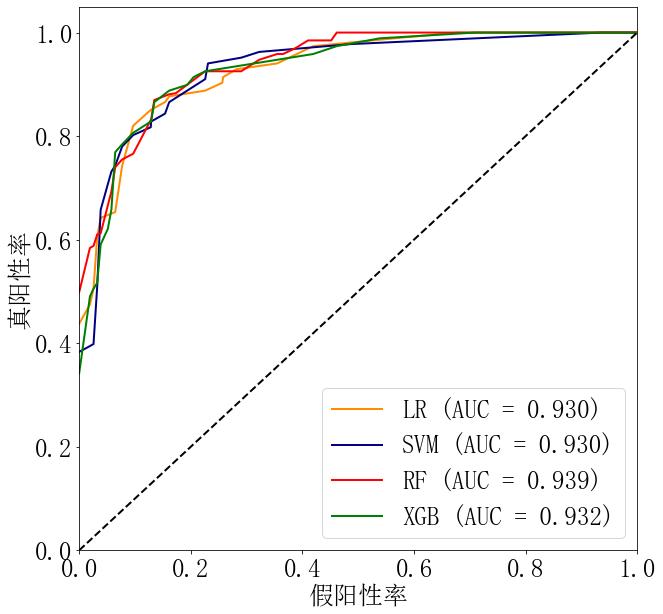

In [29]:
#绘制多组对比roc曲线
color=["darkorange","navy","red","green","yellow","pink"]
parameters = {'axes.labelsize': 25,
          'xtick.labelsize':25,
          'ytick.labelsize':25,
          'legend.fontsize':25}
plt.rcParams.update(parameters)

plt.figure(figsize=(10,10))
lw = 2
plt.plot(roc_[0][0], roc_[0][1], color=color[0], lw=lw, label=roc_[0][3]+' (AUC = %0.3f)' % roc_[0][2]) 
plt.plot(roc_[1][0], roc_[1][1], color=color[1], lw=lw, label=roc_[1][3]+' (AUC = %0.3f)' % roc_[1][2]) 
plt.plot(roc_[2][0], roc_[2][1], color=color[2], lw=lw, label=roc_[2][3]+' (AUC = %0.3f)' % roc_[2][2]) 
plt.plot(roc_[3][0], roc_[3][1], color=color[3], lw=lw, label=roc_[3][3]+' (AUC = %0.3f)' % roc_[3][2]) 
# plt.legend(fontsize=35)
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假阳性率')#False Positive Rate
plt.ylabel('真阳性率')#True Positive Rate
# plt.title('Receiver operating characteristic Curve')
plt.legend(loc="lower right")
plt.savefig(r"F:\1\data1\output\结果图片\结果\ROC(all)0903.jpg",dpi=900)
plt.show()

### 绘制混淆矩阵类比图

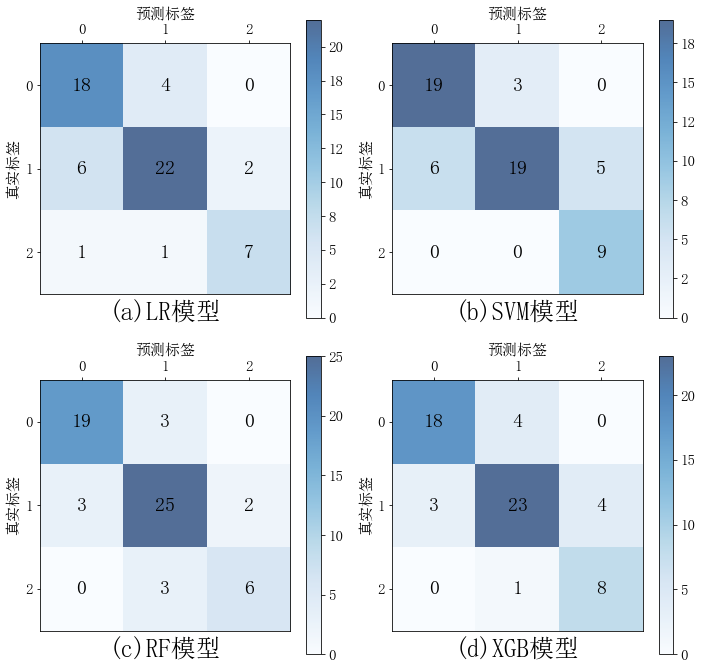

In [45]:
parameters = {'axes.labelsize': 15,
          'xtick.labelsize':15,
          'ytick.labelsize':15,
          'legend.fontsize':15}
plt.rcParams.update(parameters)
fig = plt.figure(figsize=(10,9.5))
t =['(a)','(b)','(c)','(d)']
for i in range(1,5):
    ax = fig.add_subplot(2,2,i)
    confmat = confusion_matrix(y_true=y_test, y_pred=y_test_pred_model[i-1][0])
    classes=[0,1,2]
    #ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.7)
    im = ax.imshow(confmat, cmap=plt.cm.Blues,alpha=0.7)
    indices = range(len(confmat))
    plt.xticks(indices, classes)
    plt.yticks(indices, classes)
    plt.xlabel('预测标签',fontsize=15)
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    plt.ylabel('真实标签',fontsize=15)
    plt.title(t[i-1]+y_test_pred_model[i-1][1]+'模型',fontsize=25,fontweight='bold',y=-0.13)
    fig.colorbar(im, ax=ax,format='%.0f')

    #显示数据
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            plt.text(x=j, y=i, s=confmat[i,j], va='center', ha='center',fontsize=20)
   
fig.tight_layout()#
# #自动调整子图参数，使之填充整个图像区域。
plt.savefig(r"F:\1\data1\output\结果图片\结果\ConfusionMatrix0903.jpg",dpi=900)
plt.show()

### 绘制特征重要性类比图

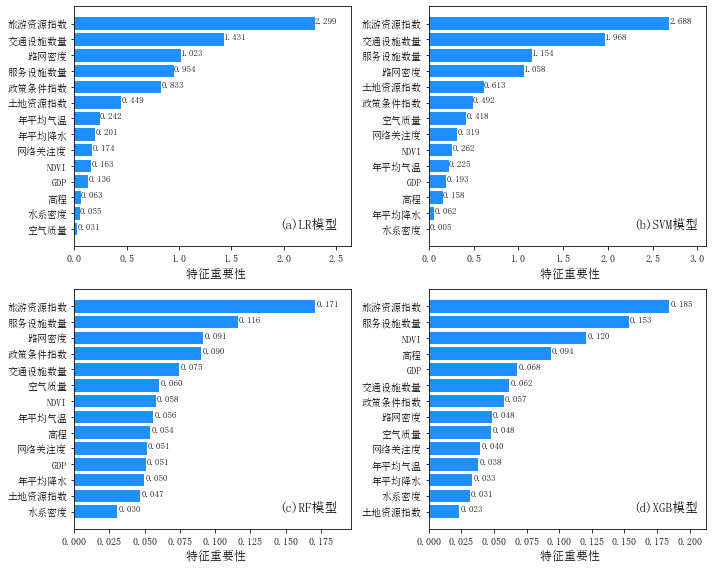

In [95]:

#输出列表
#输出一张柱形图
#输出四张柱形图

#SVM ,LR 给一个绝对值的系数，RF、LR给的是特征重要性
fig = plt.figure(figsize=(10,8))
t =['(a)','(b)','(c)','(d)']
for i in range(1,5):
    ax = fig.add_subplot(2,2,i)
    features = list(X.columns) #特征名称
    importance = pd.Series(importances[i-1][0]) #特征值
    indices = np.argsort(importance)#特征值排序
    plt.barh(range(len(indices)), importance[indices],color='dodgerblue',align='center')
    #绘制柱形图    deepskyblue  dodgerblue 
    for a,b in zip( importance[indices],range(len(indices))): # 添加数字标签
        plt.text(a+0.001, b,'%.3f'%float(a),fontsize=9)
    plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize=10)
    plt.xticks(fontsize=10)
    plt.xlabel(' 特征重要性',fontsize=12)
    font={'fontweight':'heavy','size':13}
    plt.text(x=importance[indices.iloc[-1,]]*0.85,y=0,s=t[i-1]+importances[i-1][1]+'模型',fontdict=font)
    plt.xlim(0,importance[indices.iloc[-1,]]*1.15 )
   
fig.tight_layout()
# #自动调整子图参数，使之填充整个图像区域。
plt.savefig(r"F:\1\data1\output\结果图片\结果\importance(0721).jpg",dpi=900)
plt.show()

### 调参 （学习曲线）

###  hyperopt——（贝叶斯优化）

In [67]:
def hyperopt_eval_func(params, X, y):
    """  利用params里定义的模型和超参数，对X进行fit，并返回cv socre。
    Args:
    @params: 模型和超参数
    @X:输入参数
    @y:真值
    Return:
    @score: 交叉验证的损失值
    """ 
    int_feat = ['n_estimators', 'max_depth', 'min_child_weight']
    for p in int_feat:
        params[p] = int(params[p]) 
    clf = XGBClassifier(**params,eval_metric="mlogloss",objective='multisoftmax',num_class=3,use_label_encoder=False,random_state=SEED) 
    #用cv结果来作为评价函数
    shuffle = KFold(n_splits=5, shuffle=True)
    score = -1 * cross_val_score(clf, X, y, scoring='f1_macro', cv=shuffle).mean()
    return score
 
def hyperopt_binary_model(params):
    '''hyperopt评价函数，在hyperopt_eval_func外面包围了一层，增加一些信息输出
    Args:
    @params:用hyperopt调参优化得到的超参数
    Return:
    @loss_status: loss and status
    ''' 
    global best_loss, count, binary_X, binary_y 
    count += 1 
    clf_type = params['type'] 
    del params['type']
    loss = hyperopt_eval_func(params, binary_X, binary_y)
    print(count, loss)
    if loss < best_loss:
        ss = 'count:%d new best loss: %4.3f , using %s'%(count, loss, clf_type) 
        print(ss) 
        best_loss = loss
    
    loss_status = {'loss': loss, 'status': STATUS_OK}
    return loss_status
 
def got_best_model(best):
    '''根据hyperopt搜索的参数，返回对应最优score的模型
    Args:
    @best:最优超参数
    Return:
    @clf: xgb model
    ''' 
    int_feat = ['n_estimators', 'max_depth', 'min_child_weight']
    for p in int_feat:
        best[p] = int(best[p])
    #fix the random state
    best['seed'] = SEED 
    clf = XGBClassifier(**best,eval_metric="mlogloss",objective='multisoftmax',num_class=3,use_label_encoder=False)
    
    return clf
 
 
def get_best_model(X_train, y_train, max_evals_num=10):
    '''利用hyperopt得到最优的xgb model
    Args:
    @X_train: 训练样本X 数据
    @y_train: 训练样本y target
    @predictors: 用于预测的特征
    @max_evals_num: hyperopt调参时的次数，次数越多，模型越优，但是也越耗费时间
    Return:
    @clf: 最优model
    '''
    space = { 
    'type': 'xgb',
    'n_estimators': hp.quniform('n_estimators', 50,500,50), ##50~400，每间隔50
    'max_depth': hp.quniform('max_depth', 2, 10, 1), 
    ##'learning_rate': hp.loguniform('learning_rate', np.log(0.005), np.log(0.2)) 
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2), 
    'min_child_weight': hp.quniform('min_child_weight', 2, 8, 1),
    'gamma': hp.uniform('gamma', 0, 0.5),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0) 
    } 
    #hyperopt train
    global count, best_loss, binary_X, binary_y
    count = 0
    best_loss = 1000000
    binary_X = X_train
    binary_y = y_train
    trials = Trials()
    best = fmin(hyperopt_binary_model, space, algo=tpe.suggest, max_evals=max_evals_num, trials=trials)
    print( 'best param:{}'.format(best))
    print('best trans cv mse on train:{}'.format(best_loss)) 
    
    
    clf = got_best_model(best)
    return clf
    

In [75]:
get_best_model(X, y, max_evals_num=10)


1                                                     
-0.7648750782497585                                   
count:1 new best loss: -0.765 , using xgb             
2                                                                                
-0.7959023034766741                                                              
count:2 new best loss: -0.796 , using xgb                                        
3                                                                                
-0.7451017241244945                                                              
4                                                                                
-0.7190661705799245                                                              
5                                                                                
-0.7814186231658524                                                              
6                                                                                
-0.716513250263

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.6806756072806087,
              enable_categorical=False, eval_metric='mlogloss',
              gamma=0.3648658191506387, gpu_id=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03266587479760453,
              max_delta_step=None, max_depth=10, min_child_weight=3,
              missing=nan, monotone_constraints=None, n_estimators=50,
              n_jobs=None, num_class=3, num_parallel_tree=None,
              objective='multisoftmax', predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, scale_pos_weight=None, seed=42,
              subsample=0.5023261071697409, tree_method=None, ...)

In [ ]:
print(metrics.SCORERS.keys())


dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei